<a href="https://colab.research.google.com/github/nester256/test_tf/blob/1/1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

Загружаем и подготавливаем к обработке набор данных fashion-mnist Набор данных fashion-mnist состоит из обучающего набора из 60 000 примеров и тестового набора из 10 000 примеров. Каждый пример представляет собой изображение в оттенках серого размером 28x28, связанное с меткой из 10 классов. Классы являются взаимоисключающими, и между ними нет перекрытия.

In [ ]:
(train_images, train_labels), (test_images, test_labels) = datasets.fashion_mnist.load_data()
train_images, test_images = train_images / 255.0, test_images / 255.0 # Нормализуем значения пикселей, чтобы они находились в диапазоне от 0 до 1

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

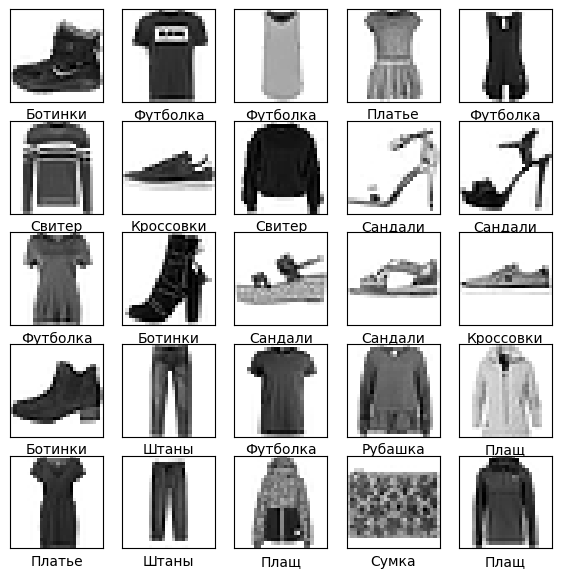

In [ ]:
class_names = ["Футболка", "Штаны", "Свитер", "Платье", "Плащ", "Сандали", "Рубашка", "Кроссовки", "Сумка", "Ботинки"]

plt.figure(figsize=(7,7))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [ ]:
# Определите модель
model = models.Sequential()
model.add(layers.Flatten(input_shape=(28, 28)))  # Преобразование изображения в одномерный массив
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_4 (Dense)             (None, 128)               100480    
                                                                 
 dense_5 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Компилируйте модель
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Обучите модель
history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))

Epoch 1/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.4949 - accuracy: 0.8256 - val_loss: 0.4192 - val_accuracy: 0.8511
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3710 - accuracy: 0.8662 - val_loss: 0.4022 - val_accuracy: 0.8561
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3359 - accuracy: 0.8780 - val_loss: 0.3713 - val_accuracy: 0.8691
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3124 - accuracy: 0.8851 - val_loss: 0.3515 - val_accuracy: 0.8744
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2934 - accuracy: 0.8920 - val_loss: 0.3608 - val_accuracy: 0.8650
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2785 - accuracy: 0.8965 - val_loss: 0.3369 - val_accuracy: 0.8792
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2654 - accuracy: 0.9019 - val_loss: 0.3443 - val_accuracy

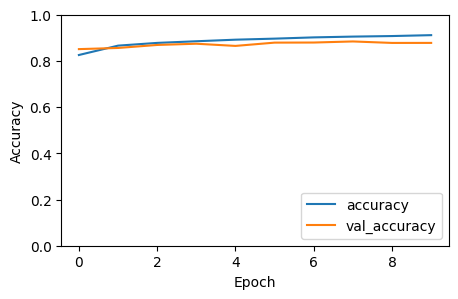

In [ ]:
# Визуализация результатов обучения
plt.figure(figsize=(5,3))
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

In [ ]:
print(test_acc)                   # Вывод точности обучения модели
y_pred=model.predict(test_images) # Предсказание модели на тестовом наборе данных

0.7041000127792358
313/313 [==============================] - 1s 2ms/step


'Платье'

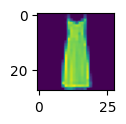

In [ ]:
# Визуализация тестируемого изображения
plt.figure(figsize=(1,1))
plt.imshow(test_images[13])

# Вывод исхода теста
k=y_pred[13].argmax()
class_names[k]